### 📚 **IEEE ECCE2025 Tutorial 16: Reimagine Power Electronics Design with AI**  
---
Welcome to the official code repository for the IEEE ECCE2025 Tutorial 16:

> **Reimagine Power Electronics Design with AI: Opportunities and Challenges Ahead**

#### 🎤 **Speakers**
1. **Xinze Li**  
   University of Arkansas  
2. **Peter Wilson**  
   University of Bath
3. **Fanfan Lin**  
   Zhejiang University–University of Illinois Urbana-Champaign Institute (ZJUI)

---

#### 👨‍💻 **Code Author**
- **Xinze Li**  
  University of Arkansas  
  *Contact: xinzel@uark.edu*

---

*We hope you enjoy the tutorial and find the resources helpful!*


## Section 1. Install Python Dependencies

* Following the index from 1 onwards
* Recommended method: use `pip` to install dependencies.
* If running in Google Colab, you can use a code cell with `!pip install ...` to install missing packages.


In [ ]:
# If requirements.txt is already in your working directory
!pip install -r requirements.txt

In [1]:
%load_ext autoreload
%autoreload 2

## Section 2. Load and Explore Your Data
    2.1 Load Data: Import your dataset and implement basic data cleaning.

    2.2 Feature Selection (PCA): Use Principal Component Analysis to identify key features.

    2.3 Exploratory Data Analysis (EDA): Visualize and summarize your data to uncover patterns and insights.

#### Section 2.1 Load Data: Import your dataset and implement basic data cleaning.

<div style="background-color:#ffe599; padding:10px; border-radius:5px; text-align:center; font-size:1.35em;">
   <b style="color:#222222;">Hands-on Experiment 1:</b>
   <span style="color:#333333;">Remove outliers and/or filter by total_ZVS</span>
</div>

In [2]:
#------------------------------------------------------------------------------------------------
# Conduct basic data cleaning
# TODO: Hands-on Experiment 1 - Remove outliers and/or filter by total_ZVS
#------------------------------------------------------------------------------------------------

import pandas as pd
import numpy as np

# Flag to control whether to apply outlier exclusion and total_ZVS filtering
apply_data_filtering = True  # Set to False to skip both outlier and total_ZVS filtering

# Load the CSV file
df = pd.read_csv("DAB_TPS.csv", index_col=0)

# Print initial shape
print("Initial shape:", df.shape)

# Filter out data where "Validity" column is 0
df_filtered = df[df['Validity'] != 0]
print("Shape after Validity filtering:", df_filtered.shape)

# Sum the specified columns
sum_columns = ["vp_t1", "vp_t2", "vp_t3", "vp_t4", "vs_t1", "vs_t2", "vs_t3", "vs_t4"]
df_filtered['total_ZVS'] = df_filtered[sum_columns].sum(axis=1)

if apply_data_filtering:
    # Filter out samples with odd sum values
    df_intermediate = df_filtered[df_filtered['total_ZVS'] % 2 == 0]
    print("Shape after total_ZVS even filtering:", df_intermediate.shape)

    # Analyze outliers in the 'ipk2pk' feature
    ipk2pk = df_intermediate['ipk2pk']
    mean_ipk2pk = ipk2pk.mean()
    std_ipk2pk = ipk2pk.std()

    # Define outlier threshold (e.g., 3 standard deviations from mean)
    upper_threshold = mean_ipk2pk + 3 * std_ipk2pk
    lower_threshold = mean_ipk2pk - 3 * std_ipk2pk

    # Identify outliers
    outliers = df_intermediate[(ipk2pk > upper_threshold) | (ipk2pk < lower_threshold)]

    print(f"ipk2pk mean: {mean_ipk2pk:.3f}, std: {std_ipk2pk:.3f}")
    print(f"Outlier threshold: < {lower_threshold:.3f} or > {upper_threshold:.3f}")
    print(f"Number of outliers in ipk2pk: {outliers.shape[0]}")

    # Exclude outliers
    df_final = df_intermediate[(ipk2pk <= upper_threshold) & (ipk2pk >= lower_threshold)]
    print(f"Shape after outlier exclusion: {df_final.shape}")
else:
    print("total_ZVS and outlier filtering not applied.")
    df_final = df_filtered.copy()
    print(f"Shape after skipping total_ZVS and outlier filtering: {df_final.shape}")


Initial shape: (5291, 18)
Shape after Validity filtering: (5291, 18)
Shape after total_ZVS even filtering: (4633, 19)
ipk2pk mean: 13.303, std: 5.266
Outlier threshold: < -2.495 or > 29.102
Number of outliers in ipk2pk: 0
Shape after outlier exclusion: (4633, 19)


#### 2.2 Feature Selection (PCA): Use Principal Component Analysis to identify key features.
* Correlation map: Feature correlation
* Histogram: Visualize the distribution of input and output variables
* Principal Component Analysis: Guide the selection of main features

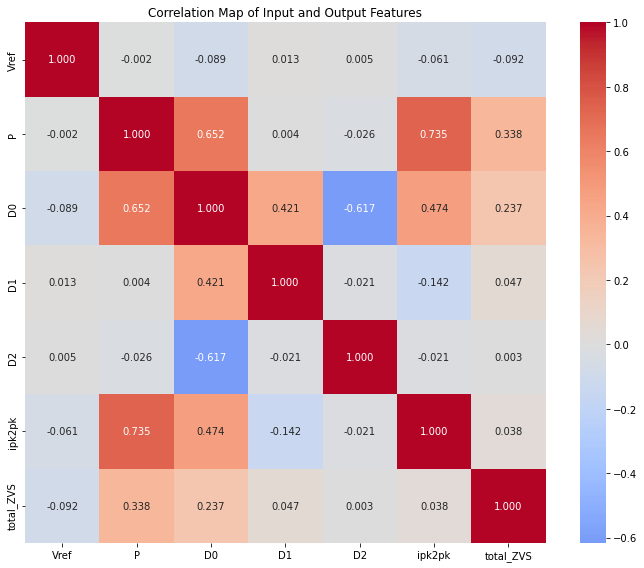

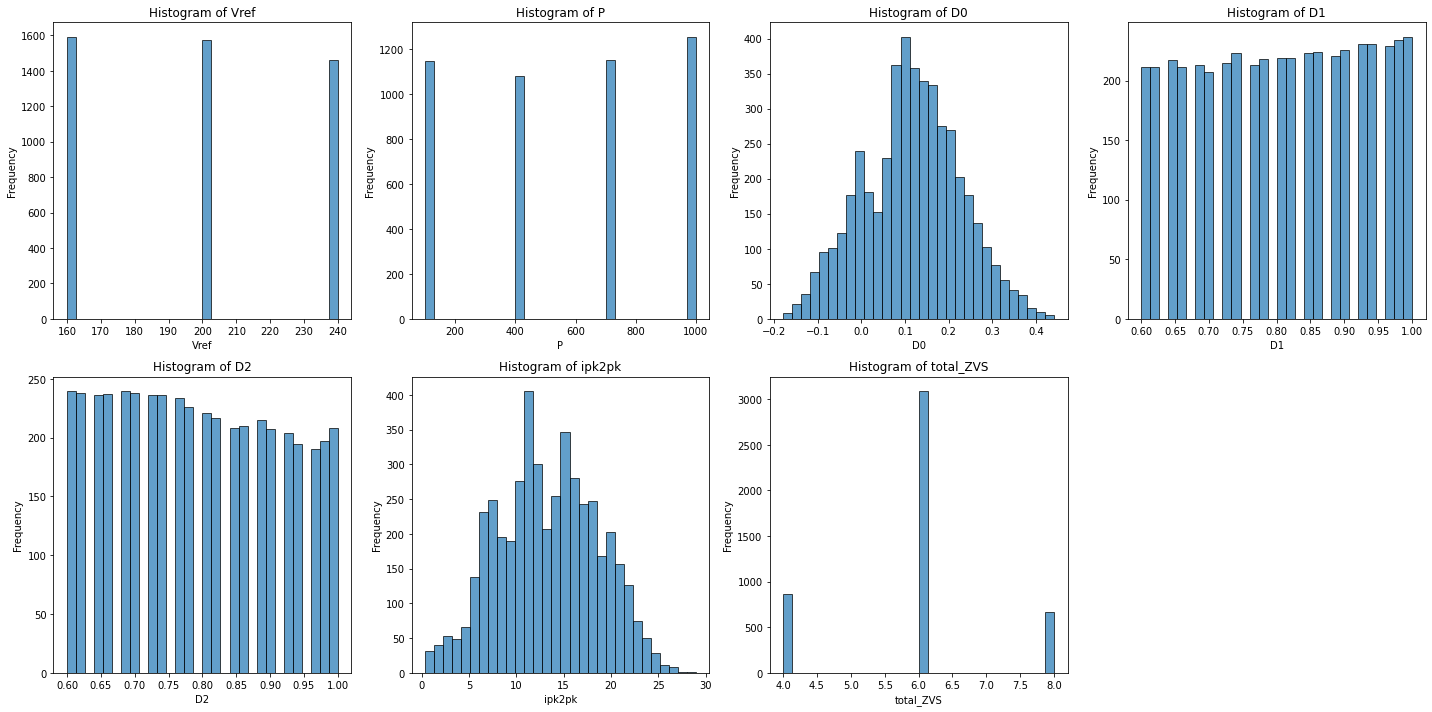

=== BASIC DATA ANALYSIS ===
Total number of samples: 4633

=== FEATURE STATISTICS ===
              Vref            P           D0           D1           D2  \
count  4633.000000  4633.000000  4633.000000  4633.000000  4633.000000   
mean    198.860350   562.788690     0.115350     0.804118     0.791604   
std      32.470202   340.236625     0.107296     0.121462     0.120520   
min     160.000000   100.000000    -0.178947     0.600000     0.600000   
25%     160.000000   400.000000     0.040641     0.700000     0.680000   
50%     200.000000   700.000000     0.119363     0.800000     0.780000   
75%     240.000000  1000.000000     0.181829     0.920000     0.900000   
max     240.000000  1000.000000     0.440729     1.000000     1.000000   

            ipk2pk    total_ZVS  
count  4633.000000  4633.000000  
mean     13.303469     5.915821  
std       5.266241     1.149751  
min       0.368701     4.000000  
25%       9.556965     6.000000  
50%      13.193537     6.000000  
75%      

In [3]:
#------------------------------------------------------------------------------------------------
# Conduct basic data analysis, including correlation map, histograms, feature ranges, etc., to guide the selection of main features
#------------------------------------------------------------------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns

# Define the features we want to analyze
input_features = ["Vref", "P", "D0", "D1", "D2"]
output_features = ["ipk2pk", "total_ZVS"]
all_features = input_features + output_features

# Import the functions to plot the correlation map, feature histograms, and basic statistical analysis
from utils import plot_correlation_map, plot_feature_histograms, basic_statistical_analysis

# 1. Correlation Map
plot_correlation_map(df_final, all_features)

# 2. Histograms for each feature
plot_feature_histograms(df_final, all_features)

# 3. Basic Statistical Analysis
basic_statistical_analysis(df_final, all_features)


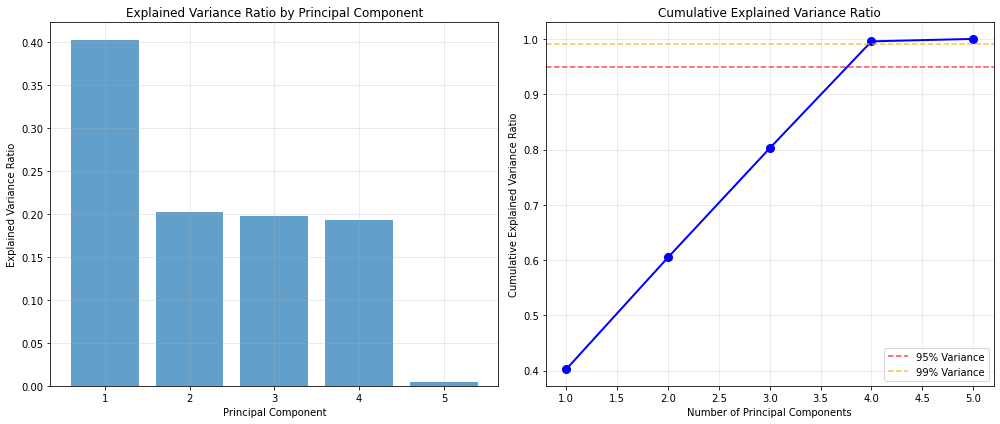

=== PCA ANALYSIS RESULTS ===
Features used: ['Vref', 'P', 'D1', 'D2', 'D0']

Explained variance ratio:
PC1: 0.4025 (40.25%)
PC2: 0.2022 (20.22%)
PC3: 0.1976 (19.76%)
PC4: 0.1933 (19.33%)
PC5: 0.0044 (0.44%)

Cumulative explained variance:
PC1-PC1: 0.4025 (40.25%)
PC1-PC2: 0.6048 (60.48%)
PC1-PC3: 0.8023 (80.23%)
PC1-PC4: 0.9956 (99.56%)
PC1-PC5: 1.0000 (100.00%)

Number of components needed for:
95% variance: 4
99% variance: 4


In [5]:
#------------------------------------------------------------------------------------------------
# Conduct PCA analysis, remember to standardize the features first
#------------------------------------------------------------------------------------------------

# Perform PCA on the selected features
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select the features for PCA
pca_features = ["Vref", "P", "D1", "D2", "D0"]
X_pca = df_final[pca_features]

# # Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

# Perform PCA
pca = PCA()
X_pca_transformed = pca.fit_transform(X_scaled)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Import the function to plot and summarize the PCA results
from utils import plot_and_summarize_pca_results

plot_and_summarize_pca_results(
    explained_variance_ratio,
    cumulative_variance_ratio,
    X_pca_transformed,
    pca,
    pca_features
)


##### The equation to show the relationship between D0, D1, D2, P, Vref, ...

#### 2.3 Exploratory Data Analysis (EDA): Visualize and summarize your data to uncover patterns and insights.
* t-SNE algorithm: Embeds dataset in feature domain and reveals latent feature manifolds

In [6]:
#------------------------------------------------------------------------------------------------
# Conduct t-SNE analysis, including 1) input, 2) output, and 3) combined features
#------------------------------------------------------------------------------------------------

# t-SNE Visualization for Input, Output, and Combined Features
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import joblib  # For saving/loading models
import os

# Boolean variable to specify whether to load trained t-SNE models from local drive
load_trained_tsne = True  # Set to True to load from disk, False to train anew

# Prepare data for t-SNE
input_data = df_final[input_features].values
output_data = df_final[output_features].values
combined_data = df_final[input_features + output_features].values

# Get unique voltage levels and power levels for coloring
voltage_levels = df_final['Vref'].unique()
power_levels = df_final['P'].unique()
voltage_colors = plt.cm.Set1(np.linspace(0, 1, len(voltage_levels)))
power_colors = plt.cm.tab10(np.linspace(0, 1, len(power_levels)))
voltage_color_map = dict(zip(voltage_levels, voltage_colors))
power_color_map = dict(zip(power_levels, power_colors))

if load_trained_tsne and os.path.exists("tsne_input_embedding.npy") and os.path.exists("tsne_output_embedding.npy") and os.path.exists("tsne_combined_embedding.npy"):
    print("Loading precomputed t-SNE embeddings from local drive...")
    input_tsne = np.load("tsne_input_embedding.npy")
    output_tsne = np.load("tsne_output_embedding.npy")
    combined_tsne = np.load("tsne_combined_embedding.npy")
    print("t-SNE features are loaded. Please conduct the next block to visualize the feature domain.")
else:
    # 1. t-SNE for Input Features
    print("Computing t-SNE for input features...")
    tsne_input = TSNE(n_components=2, random_state=42, perplexity=200)
    input_tsne = tsne_input.fit_transform(input_data)
    # Save the t-SNE embedding and model
    np.save("tsne_input_embedding.npy", input_tsne)

    # 2. t-SNE for Output Features
    print("Computing t-SNE for output features...")
    tsne_output = TSNE(n_components=2, random_state=42, perplexity=200)
    output_tsne = tsne_output.fit_transform(output_data)
    np.save("tsne_output_embedding.npy", output_tsne)

    # 3. t-SNE for Combined Features
    print("Computing t-SNE for combined features...")
    tsne_combined = TSNE(n_components=2, random_state=42, perplexity=200)
    combined_tsne = tsne_combined.fit_transform(combined_data)
    np.save("tsne_combined_embedding.npy", combined_tsne)


Loading precomputed t-SNE embeddings from local drive...
t-SNE features are loaded. Please conduct the next block to visualize the feature domain.


<div style="background-color:#ffe599; padding:10px; border-radius:5px; text-align:center; font-size:1.35em;">
   <b style="color:#222222;">Hands-on Experiment 2:</b>
   <span style="color:#333333;">Distinguish power levels or not </span>
</div>

Plotting t-SNE analysis...


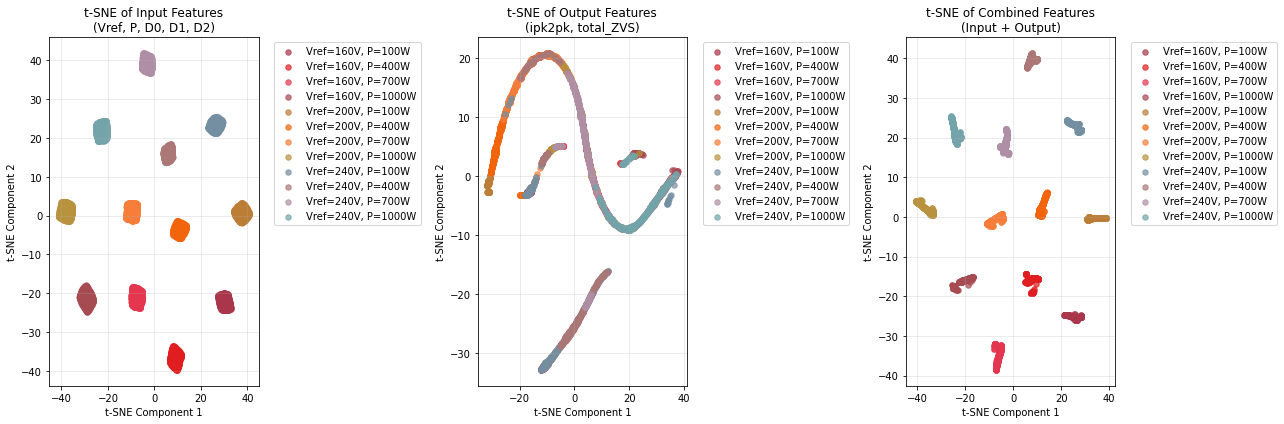


=== t-SNE ANALYSIS SUMMARY ===
Input features: ['Vref', 'P', 'D0', 'D1', 'D2']
Output features: ['ipk2pk', 'total_ZVS']
Combined features: ['Vref', 'P', 'D0', 'D1', 'D2', 'ipk2pk', 'total_ZVS']
Number of samples: 4633
Voltage levels found: [160, 200, 240]
Power levels found: [100, 400, 700, 1000]


In [7]:
#------------------------------------------------------------------------------------------------
# Visualize t-SNE results
# TODO: Hands-on Experiment 2 - Distinguish power levels or not
#------------------------------------------------------------------------------------------------

# import the function to plot the t-SNE analysis
from utils import plot_tsne_analysis

# Flag to control whether to plot power levels
plot_power_levels = True  # Set to False to only plot voltage levels

print("Plotting t-SNE analysis...")
kwargs = {}
if plot_power_levels:
    kwargs = dict(power_levels=power_levels, power_color_map=power_color_map)
plot_tsne_analysis(
    df_final,
    voltage_levels,
    voltage_color_map,
    input_tsne,
    output_tsne,
    combined_tsne,
    input_features,
    output_features,
    **kwargs
)

## Section 3. Data-Driven Modeling of Current Stress and ZVS
    3.1 Feedforward NN for Current Stress *Regression*

    3.2 Feedforward NN for ZVS *Classification*

    3.3 Anytime Algorithms: Ensemble Learning Algorithms - Random Forest and XGBoost

#### 3.1 Feedforward NN for Current Stress **Regression**
    Conduct the following experiments one-by-one to understand its effects
* Standardize inputs: Scale inputs within [0, 1]; or normalize to normal distribution with Norm(0, 1)
* Normalization layer: Normalize fully-connected layer's output to accelerate training and convergence
* Z-score weights: Similar effects as normalization layer
* Learning rate scheduler: Update learning rate heuristically
* Tune some NN hyper-parameters: 1) Hidden size; 2) Number of layers
* Impacts of activation functions on function surface (regression): 1) ReLU; 2) tanh

<div style="background-color:#ffe599; padding:10px; border-radius:5px; text-align:center; font-size:1.35em;">
   <b style="color:#222222;">Hands-on Experiment 3:</b>
   <span style="color:#333333;">Develop FNN for Current Stress Modeling</span>
</div>

In [8]:
#------------------------------------------------------------------------------------------------
# Define the neural network architecture, implement the training process, and tune the hyper-parameters
# TODO: Hands-on Experiment 3 - Develop FNN for Current Stress Modeling
#------------------------------------------------------------------------------------------------

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import copy

# =========================
# Configurable flags/params
# =========================
USE_STANDARDIZE = True  # Flag: whether to standardize input features
USE_BATCHNORM = True    # Flag: whether to use batch normalization
USE_ZSCORE_GRAD = True  # Flag: whether to z-score gradients
USE_LR_SCHEDULER = True # Flag: whether to use learning rate scheduler

HIDDEN_SIZE = 32        # Parameter: hidden layer size
NUM_HIDDEN_LAYERS = 2   # Parameter: number of hidden layers

ACTIVATION = "relu"     # Variable: activation function, options: "relu", "tanh"

# =========================
# Activation function selector
# =========================
def get_activation(name):
    if name == "relu":
        return nn.ReLU()
    elif name == "tanh":
        return nn.Tanh()
    else:
        raise ValueError(f"Unknown activation: {name}")

# =========================
# Neural network definition
# =========================
class CurrentStressMLP(nn.Module):
    def __init__(self, input_size=4, hidden_size=32, num_hidden_layers=2, activation="relu", use_batchnorm=True):
        super(CurrentStressMLP, self).__init__()
        layers = []
        in_dim = input_size
        act = get_activation(activation)
        for i in range(num_hidden_layers):
            layers.append(nn.Linear(in_dim, hidden_size))
            if use_batchnorm:
                layers.append(nn.BatchNorm1d(hidden_size))
            layers.append(act)
            in_dim = hidden_size
        layers.append(nn.Linear(hidden_size, 1))
        self.model = nn.Sequential(*layers)
        
    def forward(self, x):
        return self.model(x)

# =========================
# Custom dataset class
# =========================
class CurrentStressDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X)
        self.y = torch.FloatTensor(y).reshape(-1, 1)
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# =========================
# Prepare the data
# =========================
input_features = ["P", "Vref", "D1", "D2"]
output_feature = "ipk2pk"

# Extract features and target
X = df_final[input_features].values
y = df_final[output_feature].values

# Split the data: train/val/test (60/20/20)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Feature scaling or normalization is important for the training of the neural network
if USE_STANDARDIZE:
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)
else:
    X_train_scaled = X_train
    X_val_scaled = X_val
    X_test_scaled = X_test

# Create datasets and dataloaders
train_dataset = CurrentStressDataset(X_train_scaled, y_train)
val_dataset = CurrentStressDataset(X_val_scaled, y_val)
test_dataset = CurrentStressDataset(X_test_scaled, y_test)

train_loader = DataLoader(train_dataset, batch_size=1000, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=1000, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

# =========================
# Initialize the model and JIT compile it
# =========================
model_NN_regression = CurrentStressMLP(
    input_size=len(input_features),
    hidden_size=HIDDEN_SIZE,
    num_hidden_layers=NUM_HIDDEN_LAYERS,
    activation=ACTIVATION,
    use_batchnorm=USE_BATCHNORM
)

# Use torch.jit.script to compile the model for acceleration
model_NN_regression = torch.jit.script(model_NN_regression)

criterion = nn.MSELoss()
optimizer = optim.Adam(model_NN_regression.parameters(), lr=0.1)  # Higher initial learning rate

if USE_LR_SCHEDULER:
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=40, gamma=0.5)  # Reduce LR every 200 epochs

# =========================
# Training loop
# =========================
num_epochs = 200
train_losses = []
val_losses = []
test_losses = []  # <--- Add test loss tracking
best_val_loss = float('inf')
best_model_state = None

print("Training the neural network...")
for epoch in range(num_epochs):
    # Training phase
    model_NN_regression.train()
    train_loss = 0.0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model_NN_regression(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        
        # Gradient z-scoring if enabled
        if USE_ZSCORE_GRAD:
            for param in model_NN_regression.parameters():
                if param.grad is not None:
                    grad_mean = param.grad.mean()
                    grad_std = param.grad.std()
                    if grad_std > 0:
                        param.grad = (param.grad - grad_mean) / grad_std
        
        optimizer.step()
        train_loss += loss.item()
    
    # Update learning rate if enabled
    if USE_LR_SCHEDULER:
        scheduler.step()
    
    # Validation phase
    model_NN_regression.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            outputs = model_NN_regression(batch_X)
            loss = criterion(outputs, batch_y)
            val_loss += loss.item()
    
    # Test phase (record test loss)
    test_loss = 0.0
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            outputs = model_NN_regression(batch_X)
            loss = criterion(outputs, batch_y)
            test_loss += loss.item()
    
    train_losses.append(train_loss / len(train_loader))
    val_losses.append(val_loss / len(val_loader))
    test_losses.append(test_loss / len(test_loader))
    
    # Save best model on validation set
    if val_losses[-1] < best_val_loss:
        best_val_loss = val_losses[-1]
        # For JIT models, state_dict is still supported
        best_model_state = copy.deepcopy(model_NN_regression.state_dict())
    
    if (epoch + 1) % 20 == 0:
        if USE_LR_SCHEDULER:
            current_lr = scheduler.get_last_lr()[0]
        else:
            current_lr = optimizer.param_groups[0]['lr']
        print(f'Epoch [{epoch+1}/{num_epochs}], LR: {current_lr:.6f}, Train Loss: {train_losses[-1]:.6f}, Val Loss: {val_losses[-1]:.6f}, Test Loss: {test_losses[-1]:.6f}')

# Load best model weights (on validation set)
if best_model_state is not None:
    model_NN_regression.load_state_dict(best_model_state)


Training the neural network...


C:\Temp/ipykernel_22136/2730376615.py:156: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\ReduceOps.cpp:1808.)
  grad_std = param.grad.std()


Epoch [20/200], LR: 0.100000, Train Loss: 0.584161, Val Loss: 1.967605, Test Loss: 1.952045
Epoch [40/200], LR: 0.050000, Train Loss: 0.515514, Val Loss: 0.552265, Test Loss: 0.515704
Epoch [60/200], LR: 0.050000, Train Loss: 0.392769, Val Loss: 0.241990, Test Loss: 0.228820
Epoch [80/200], LR: 0.025000, Train Loss: 0.297107, Val Loss: 0.248697, Test Loss: 0.242883
Epoch [100/200], LR: 0.025000, Train Loss: 0.341515, Val Loss: 0.283327, Test Loss: 0.276628
Epoch [120/200], LR: 0.012500, Train Loss: 0.245915, Val Loss: 0.204362, Test Loss: 0.197857
Epoch [140/200], LR: 0.012500, Train Loss: 0.228715, Val Loss: 0.189226, Test Loss: 0.187372
Epoch [160/200], LR: 0.006250, Train Loss: 0.317444, Val Loss: 0.190831, Test Loss: 0.201574
Epoch [180/200], LR: 0.006250, Train Loss: 0.241981, Val Loss: 0.168529, Test Loss: 0.166805
Epoch [200/200], LR: 0.003125, Train Loss: 0.262717, Val Loss: 0.162157, Test Loss: 0.164680



=== MODEL PERFORMANCE ===
Mean Squared Error: 0.157320
Root Mean Squared Error: 0.396636
R² Score: 0.994559


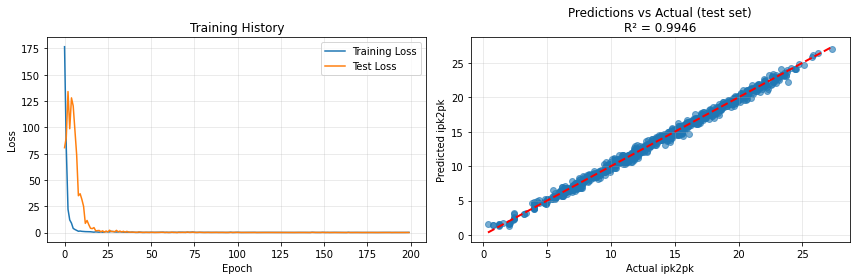

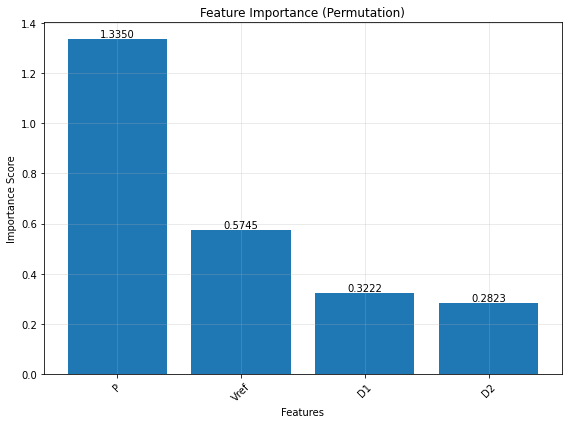


=== FEATURE IMPORTANCE ===
P: 1.335024
Vref: 0.574465
D1: 0.322186
D2: 0.282309


In [9]:
#------------------------------------------------------------------------------------------------
# Plot and report the model performance
#------------------------------------------------------------------------------------------------

# Evaluate the model
model_NN_regression.eval()
with torch.no_grad():
    y_pred = model_NN_regression(torch.FloatTensor(X_test_scaled)).numpy().flatten()

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

from utils import plot_and_report_model_performance

# Plot and report the model performance
plot_and_report_model_performance(
    mse, rmse, r2,
    train_losses, test_losses,
    y_test, y_pred,
    model_NN_regression, X_test_scaled, input_features
)


=== 3D MESH PLOT ===
Generating 3D mesh plot of current stress vs D1 and D2 (P=100, Vref=240)...


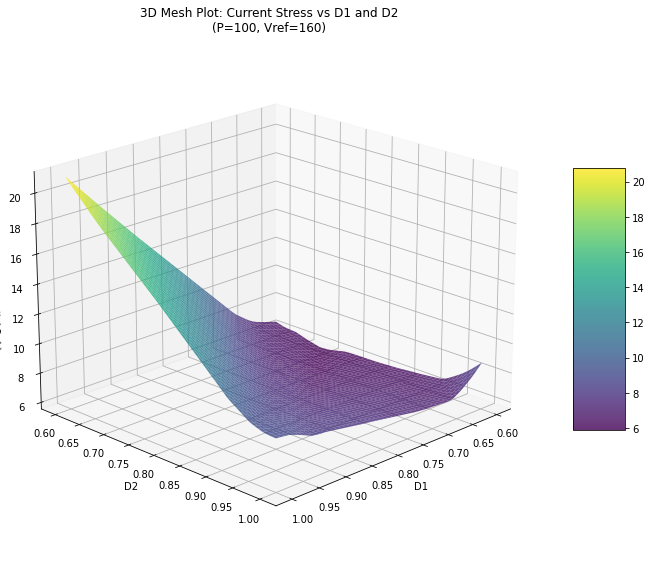

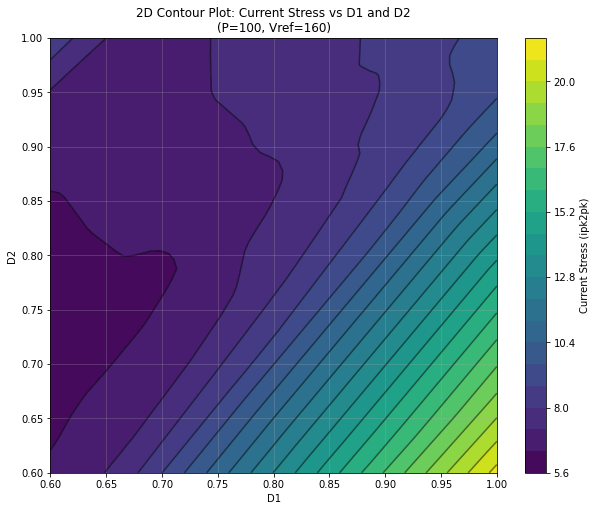

In [10]:
#------------------------------------------------------------------------------------------------
# Observe the model surface and contour plots, change the activation function and understand the effects
#------------------------------------------------------------------------------------------------

# 3D Mesh plot of current stress with respect to D1 and D2
print(f"\n=== 3D MESH PLOT ===")
print("Generating 3D mesh plot of current stress vs D1 and D2 (P=100, Vref=240)...")

# Create meshgrid for D1 and D2
D1_range = np.linspace(X_test_scaled[:, 2].min(), X_test_scaled[:, 2].max(), 50)  # D1 is at index 2
D2_range = np.linspace(X_test_scaled[:, 3].min(), X_test_scaled[:, 3].max(), 50)  # D2 is at index 3
D1_mesh, D2_mesh = np.meshgrid(D1_range, D2_range)

# Fixed values for P and Vref (scaled)
P_fixed = 100
Vref_fixed = 160

# Transform the fixed values using the same scaler
P_scaled = scaler.transform([[P_fixed, 0, 0, 0]])[0, 0]  # Get P value
Vref_scaled = scaler.transform([[0, Vref_fixed, 0, 0]])[0, 1]  # Get Vref value

# Create a 3D mesh plot of the current stress vs D1 and D2
# Create input array for prediction
X_contour = np.zeros((D1_mesh.size, 4))
X_contour[:, 0] = P_scaled  # P (fixed) - index 0
X_contour[:, 1] = Vref_scaled  # Vref (fixed) - index 1
X_contour[:, 2] = D1_mesh.flatten()  # D1 - index 2
X_contour[:, 3] = D2_mesh.flatten()  # D2 - index 3

# Predict current stress
model_NN_regression.eval()
with torch.no_grad():
    stress_pred = model_NN_regression(torch.FloatTensor(X_contour)).numpy().flatten()

# Reshape predictions back to meshgrid shape
stress_mesh = stress_pred.reshape(D1_mesh.shape)

# Inverse transform D1 and D2 back to original scale
D1_original = np.zeros((D1_mesh.size, 4))
D1_original[:, 2] = D1_mesh.flatten()  # Set D1 values
D1_original = scaler.inverse_transform(D1_original)
D1_original = D1_original[:, 2].reshape(D1_mesh.shape)


D2_original = np.zeros((D2_mesh.size, 4))
D2_original[:, 3] = D2_mesh.flatten()  # Set D2 values
D2_original = scaler.inverse_transform(D2_original)
D2_original = D2_original[:, 3].reshape(D2_mesh.shape)

# Plot the 3D mesh and 2D contour plot of the current stress
from utils import plot_stress_mesh_and_contour

plot_stress_mesh_and_contour(D1_original, D2_original, stress_mesh, 
                                 mesh_title=f'3D Mesh Plot: Current Stress vs D1 and D2\n(P={P_fixed}, Vref={Vref_fixed})', 
                                 contour_title=f'2D Contour Plot: Current Stress vs D1 and D2\n(P={P_fixed}, Vref={Vref_fixed})')

#### 3.2 Feedforward NN for Zero Voltage Switching **Classification**
    Conduct the following experiments one-by-one to understand its effects
* Standardize inputs: Scale inputs within [0, 1]; or normalize to normal distribution with Norm(0, 1)
* Normalization layer: Normalize fully-connected layer's output to accelerate training and convergence
* Z-score weights: Similar effects as normalization layer
* Learning rate scheduler: Update learning rate heuristically
* Tune some NN hyper-parameters: 1) Hidden size; 2) Number of layers
* Impacts of activation functions on decision plane (classification): 1) ReLU; 2) tanh

<div style="background-color:#ffe599; padding:10px; border-radius:5px; text-align:center; font-size:1.35em;">
   <b style="color:#222222;">Hands-on Experiment 4:</b>
   <span style="color:#333333;">Develop FNN for Zero Voltage Switching Modeling</span>
</div>

In [11]:
#------------------------------------------------------------------------------------------------
# Define the neural network architecture, implement the training process, and tune the hyper-parameters
# TODO: Hands-on Experiment 4 - Develop FNN for Zero Voltage Switching Modeling
#------------------------------------------------------------------------------------------------

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import copy

# =========================
# Configurable flags/params
# =========================
USE_STANDARDIZE = True  # Flag: whether to standardize input features
USE_BATCHNORM = True    # Flag: whether to use batch normalization
USE_ZSCORE_GRAD = True  # Flag: whether to z-score gradients
USE_LR_SCHEDULER = True # Flag: whether to use learning rate scheduler

HIDDEN_SIZE = 32        # Parameter: hidden layer size
NUM_HIDDEN_LAYERS = 2   # Parameter: number of hidden layers

ACTIVATION = "tanh"     # Variable: activation function, options: "relu", "tanh"

# =========================
# Activation function selector
# =========================
def get_activation(name):
    if name == "relu":
        return nn.ReLU()
    elif name == "tanh":
        return nn.Tanh()
    else:
        raise ValueError(f"Unknown activation: {name}")

# =========================
# Neural network definition for ZVS classification
# =========================
class ZVSClassificationMLP(nn.Module):
    def __init__(self, input_size=4, hidden_size=32, num_hidden_layers=2, activation="relu", use_batchnorm=True, num_classes=3):
        super(ZVSClassificationMLP, self).__init__()
        layers = []
        in_dim = input_size
        act = get_activation(activation)
        for i in range(num_hidden_layers):
            layers.append(nn.Linear(in_dim, hidden_size))
            if use_batchnorm:
                layers.append(nn.BatchNorm1d(hidden_size))
            layers.append(act)
            in_dim = hidden_size
        layers.append(nn.Linear(hidden_size, num_classes))
        self.model = nn.Sequential(*layers)
        
    def forward(self, x):
        return self.model(x)

# =========================
# Custom dataset class for ZVS classification
# =========================
class ZVSClassificationDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X)
        self.y = torch.LongTensor(y)
        # Map 4->0, 6->1, 8->2 for 3 classes (0,1,2)
        self.map_y = {4: 0, 6: 1, 8: 2}
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        y_value = self.y[idx].item()
        return self.X[idx], self.map_y[y_value]

# =========================
# Prepare the data
# =========================
input_features = ["P", "Vref", "D1", "D2"]
output_feature = "total_ZVS"

# Extract features and target
X = df_final[input_features].values
y = df_final[output_feature].values

# Split the data: train/val/test (60/20/20)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Feature scaling or normalization is important for the training of the neural network
if USE_STANDARDIZE:
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)
else:
    X_train_scaled = X_train
    X_val_scaled = X_val
    X_test_scaled = X_test

# Create datasets and dataloaders
train_dataset = ZVSClassificationDataset(X_train_scaled, y_train)
val_dataset = ZVSClassificationDataset(X_val_scaled, y_val)
test_dataset = ZVSClassificationDataset(X_test_scaled, y_test)

train_loader = DataLoader(train_dataset, batch_size=1000, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=1000, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

# =========================
# Initialize the model
# =========================
num_classes = len(np.unique([4, 6, 8]))  # Always 3 for this problem
model_NN_classification = ZVSClassificationMLP(
    input_size=len(input_features),
    hidden_size=HIDDEN_SIZE,
    num_hidden_layers=NUM_HIDDEN_LAYERS,
    activation=ACTIVATION,
    use_batchnorm=USE_BATCHNORM,
    num_classes=num_classes
)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_NN_classification.parameters(), lr=0.1)  # Higher initial learning rate

if USE_LR_SCHEDULER:
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=40, gamma=0.5)  # Reduce LR every 200 epochs

# =========================
# Training loop
# =========================
num_epochs = 300
train_losses = []
val_losses = []
test_losses = []
best_val_loss = float('inf')
best_model_state = None

print("Training the ZVS classification neural network...")
for epoch in range(num_epochs):
    # Training phase
    model_NN_classification.train()
    train_loss = 0.0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model_NN_classification(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        
        # Gradient z-scoring if enabled
        if USE_ZSCORE_GRAD:
            for param in model_NN_classification.parameters():
                if param.grad is not None:
                    grad_mean = param.grad.mean()
                    grad_std = param.grad.std()
                    if grad_std > 0:
                        param.grad = (param.grad - grad_mean) / grad_std
        
        optimizer.step()
        train_loss += loss.item()
    
    # Update learning rate if enabled
    if USE_LR_SCHEDULER:
        scheduler.step()
    
    # Validation phase
    model_NN_classification.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            outputs = model_NN_classification(batch_X)
            loss = criterion(outputs, batch_y)
            val_loss += loss.item()
    
    # Test phase (track test loss)
    test_loss = 0.0
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            outputs = model_NN_classification(batch_X)
            loss = criterion(outputs, batch_y)
            test_loss += loss.item()
    
    train_losses.append(train_loss / len(train_loader))
    val_losses.append(val_loss / len(val_loader))
    test_losses.append(test_loss / len(test_loader))
    
    # Save best model on validation set
    if val_losses[-1] < best_val_loss:
        best_val_loss = val_losses[-1]
        best_model_state = copy.deepcopy(model_NN_classification.state_dict())
    
    if (epoch + 1) % 20 == 0:
        if USE_LR_SCHEDULER:
            current_lr = scheduler.get_last_lr()[0]
        else:
            current_lr = optimizer.param_groups[0]['lr']
        print(f'Epoch [{epoch+1}/{num_epochs}], LR: {current_lr:.6f}, Train Loss: {train_losses[-1]:.6f}, Val Loss: {val_losses[-1]:.6f}, Test Loss: {test_losses[-1]:.6f}')

# Load best model weights (on validation set)
if best_model_state is not None:
    model_NN_classification.load_state_dict(best_model_state)


Training the ZVS classification neural network...
Epoch [20/300], LR: 0.100000, Train Loss: 0.125688, Val Loss: 0.258123, Test Loss: 0.271154
Epoch [40/300], LR: 0.050000, Train Loss: 0.089401, Val Loss: 0.239211, Test Loss: 0.230494
Epoch [60/300], LR: 0.050000, Train Loss: 0.071902, Val Loss: 0.108175, Test Loss: 0.121794
Epoch [80/300], LR: 0.025000, Train Loss: 0.076850, Val Loss: 0.118990, Test Loss: 0.130659
Epoch [100/300], LR: 0.025000, Train Loss: 0.077040, Val Loss: 0.095647, Test Loss: 0.119366
Epoch [120/300], LR: 0.012500, Train Loss: 0.084205, Val Loss: 0.083035, Test Loss: 0.122845
Epoch [140/300], LR: 0.012500, Train Loss: 0.055348, Val Loss: 0.077641, Test Loss: 0.115634
Epoch [160/300], LR: 0.006250, Train Loss: 0.046818, Val Loss: 0.078137, Test Loss: 0.100027
Epoch [180/300], LR: 0.006250, Train Loss: 0.042233, Val Loss: 0.078522, Test Loss: 0.107548
Epoch [200/300], LR: 0.003125, Train Loss: 0.043766, Val Loss: 0.075208, Test Loss: 0.105981
Epoch [220/300], LR: 0.0


=== ZVS CLASSIFICATION MODEL PERFORMANCE ===
Accuracy: 0.963323
Precision: 0.963572
Recall: 0.963323
F1-Score: 0.963391


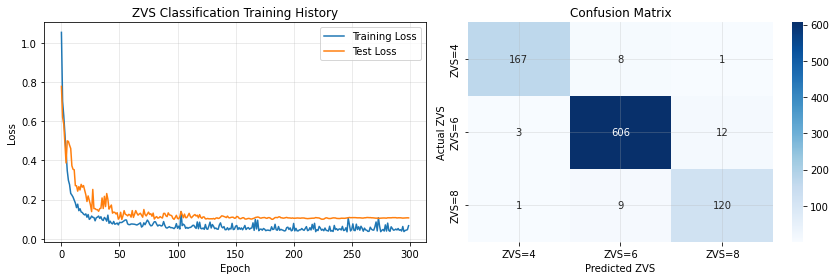

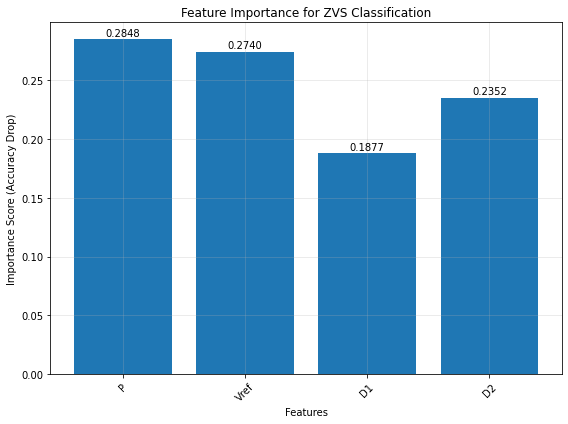


=== FEATURE IMPORTANCE FOR ZVS CLASSIFICATION ===
P: 0.284790
Vref: 0.274002
D1: 0.187702
D2: 0.235167

=== DETAILED CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

       ZVS=4       0.98      0.95      0.96       176
       ZVS=6       0.97      0.98      0.97       621
       ZVS=8       0.90      0.92      0.91       130

    accuracy                           0.96       927
   macro avg       0.95      0.95      0.95       927
weighted avg       0.96      0.96      0.96       927



In [12]:
#------------------------------------------------------------------------------------------------
# Plot and report the ZVS classification model performance
#------------------------------------------------------------------------------------------------

# Import required metrics from sklearn
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Evaluate the ZVS classification model
model_NN_classification.eval()
with torch.no_grad():
    y_pred_probs = model_NN_classification(torch.FloatTensor(X_test_scaled))
    y_pred_classes = torch.argmax(y_pred_probs, dim=1).numpy()

# Apply the same mapping to y_test as used in the dataset
map_y = {4: 0, 6: 1, 8: 2}  # Map 4->0, 6->1, 8->2 for 3 classes (0,1,2)
y_test_mapped = np.array([map_y[y] for y in y_test])

# Calculate classification metrics
accuracy = accuracy_score(y_test_mapped, y_pred_classes)
precision = precision_score(y_test_mapped, y_pred_classes, average='weighted')
recall = recall_score(y_test_mapped, y_pred_classes, average='weighted')
f1 = f1_score(y_test_mapped, y_pred_classes, average='weighted')

print(f"\n=== ZVS CLASSIFICATION MODEL PERFORMANCE ===")
print(f"Accuracy: {accuracy:.6f}")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1:.6f}")

# Plot the classification results
from utils import plot_classification_results

plot_classification_results(
    train_losses,
    test_losses,
    y_test_mapped,
    y_pred_classes,
    model_NN_classification,
    X_test_scaled,
    input_features
)



=== 2D ZVS CLASSIFICATION PLOT ===
Generating 2D plot of ZVS classification vs D1 and D2 (P=300, Vref=160)...


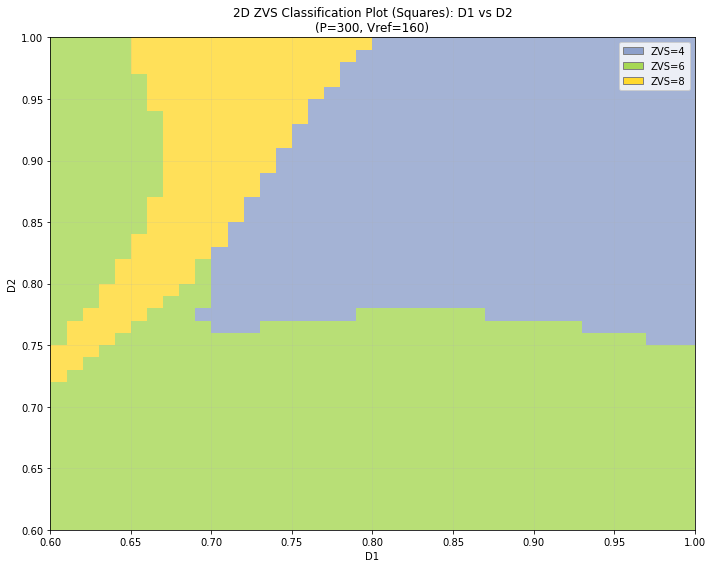

In [14]:
#------------------------------------------------------------------------------------------------
# Observe the decision plane, change the activation function and understand the effects
#------------------------------------------------------------------------------------------------

# Create a 2D plot of ZVS classification with respect to the meshgrid of D1 and D2
# Create meshgrid for D1 and D2
D1_range = np.linspace(X_test_scaled[:, 2].min(), X_test_scaled[:, 2].max(), 500)  # D1 is at index 2
D2_range = np.linspace(X_test_scaled[:, 3].min(), X_test_scaled[:, 3].max(), 500)  # D2 is at index 3
D1_mesh, D2_mesh = np.meshgrid(D1_range, D2_range)

# Fixed values for P and Vref (scaled)
P_fixed = 300
Vref_fixed = 160

print(f"\n=== 2D ZVS CLASSIFICATION PLOT ===")
print(f"Generating 2D plot of ZVS classification vs D1 and D2 (P={P_fixed}, Vref={Vref_fixed})...")

# Transform the fixed values using the same scaler
P_scaled = scaler.transform([[P_fixed, 0, 0, 0]])[0, 0]  # Get P value
Vref_scaled = scaler.transform([[0, Vref_fixed, 0, 0]])[0, 1]  # Get Vref value

# Create input array for prediction
X_contour = np.zeros((D1_mesh.size, 4))
X_contour[:, 0] = P_scaled  # P (fixed) - index 0
X_contour[:, 1] = Vref_scaled  # Vref (fixed) - index 1
X_contour[:, 2] = D1_mesh.flatten()  # D1 - index 2
X_contour[:, 3] = D2_mesh.flatten()  # D2 - index 3

# Predict ZVS classification
model_NN_classification.eval()
with torch.no_grad():
    zvs_pred = torch.argmax(model_NN_classification(torch.FloatTensor(X_contour)), dim=1).numpy()

# Reshape predictions back to meshgrid shape
zvs_mesh = zvs_pred.reshape(D1_mesh.shape)

# Inverse transform D1 and D2 back to original scale
D1_original = np.zeros((D1_mesh.size, 4))
D1_original[:, 2] = D1_mesh.flatten()  # Set D1 values
D1_original = scaler.inverse_transform(D1_original)
D1_original = D1_original[:, 2].reshape(D1_mesh.shape)

D2_original = np.zeros((D2_mesh.size, 4))
D2_original[:, 3] = D2_mesh.flatten()  # Set D2 values
D2_original = scaler.inverse_transform(D2_original)
D2_original = D2_original[:, 3].reshape(D2_mesh.shape)

# Plot the 2D ZVS classification plot
from utils import plot_2d_zvs_classification

# plot the 2D ZVS classification plot
plot_2d_zvs_classification(D1_original, D2_original, zvs_mesh, P_fixed, Vref_fixed)

#### 3.3 **Anytime** Algorithms: Ensemble Learning Algorithms - Random Forest and XGBoost
    Implement XGBoost algorithms to model current stress and ZVS performances

Training the XGBoost model...
[15:02:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:13.40891
[1]	validation_0-rmse:13.28036
[2]	validation_0-rmse:13.15278
[3]	validation_0-rmse:13.03366
[4]	validation_0-rmse:12.91586
[5]	validation_0-rmse:12.79216
[6]	validation_0-rmse:12.67658
[7]	validation_0-rmse:12.55876
[8]	validation_0-rmse:12.44146
[9]	validation_0-rmse:12.32205
[10]	validation_0-rmse:12.20709
[11]	validation_0-rmse:12.09036
[12]	validation_0-rmse:11.97712
[13]	validation_0-rmse:11.86583
[14]	validation_0-rmse:11.75543
[15]	validation_0-rmse:11.64712
[16]	validation_0-rmse:11.54203
[17]	v

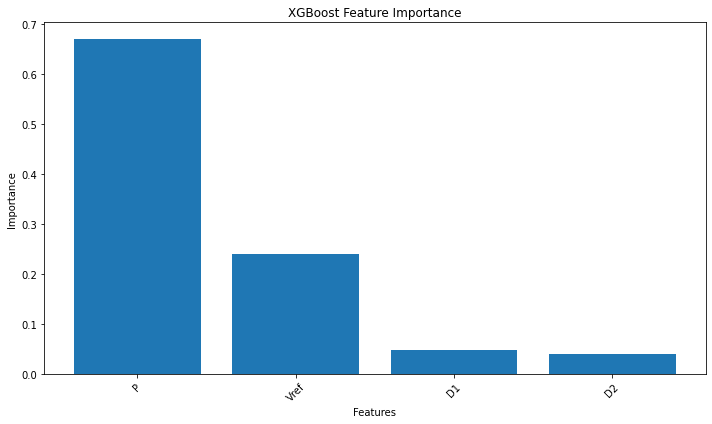

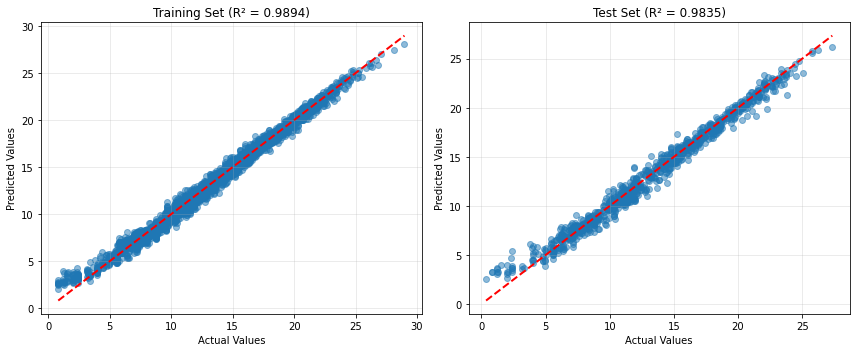

In [15]:
#------------------------------------------------------------------------------------------------
# Define the xgboost model for current stress modeling, and implement the training process
#------------------------------------------------------------------------------------------------

import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Prepare the data
input_features = ["P", "Vref", "D1", "D2"]
output_feature = "ipk2pk"

# Extract features and target
X = df_final[input_features].values
y = df_final[output_feature].values

# Split the data: train/val/test (60/20/20) similar to the reference codes
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Initialize XGBoost model
xgb_model = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=6,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    early_stopping_rounds=50,
    eval_metric='rmse'
)

# Training the XGBoost model
print("Training the XGBoost model...")
xgb_model.fit(
    X_train_scaled, y_train,
    eval_set=[(X_val_scaled, y_val)],
    verbose=True
)

# Make predictions
y_train_pred = xgb_model.predict(X_train_scaled)
y_val_pred = xgb_model.predict(X_val_scaled)
y_test_pred = xgb_model.predict(X_test_scaled)

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"\nXGBoost Results:")
print(f"Train MSE: {train_mse:.6f}")
print(f"Val MSE: {val_mse:.6f}")
print(f"Test MSE: {test_mse:.6f}")
print(f"Train R²: {train_r2:.6f}")
print(f"Val R²: {val_r2:.6f}")
print(f"Test R²: {test_r2:.6f}")

# Feature importance
feature_importance = xgb_model.feature_importances_
feature_names = input_features

# Plot the feature importance and predictions
from utils import plot_xgboost_feature_importance_and_predictions

plot_xgboost_feature_importance_and_predictions(
    feature_names=feature_names,
    feature_importance=feature_importance,
    y_train=y_train,
    y_train_pred=y_train_pred,
    train_r2=train_r2,
    y_test=y_test,
    y_test_pred=y_test_pred,
    test_r2=test_r2
)


Training the ZVS classification XGBoost model...
[15:03:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-merror:0.07875
[1]	validation_0-merror:0.07875
[2]	validation_0-merror:0.08091
[3]	validation_0-merror:0.07443
[4]	validation_0-merror:0.07012
[5]	validation_0-merror:0.06904
[6]	validation_0-merror:0.07120
[7]	validation_0-merror:0.06904
[8]	validation_0-merror:0.06688
[9]	validation_0-merror:0.06688
[10]	validation_0-merror:0.06688
[11]	validation_0-merror:0.06580
[12]	validation_0-merror:0.06473
[13]	validation_0-merror:0.06688
[14]	validation_0-merror:0.06580
[15]	validation_0-merror:0.06365
[16

d:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[28]	validation_0-merror:0.05178
[29]	validation_0-merror:0.05178
[30]	validation_0-merror:0.05178
[31]	validation_0-merror:0.04962
[32]	validation_0-merror:0.04962
[33]	validation_0-merror:0.04962
[34]	validation_0-merror:0.04962
[35]	validation_0-merror:0.04962
[36]	validation_0-merror:0.04854
[37]	validation_0-merror:0.04962
[38]	validation_0-merror:0.04962
[39]	validation_0-merror:0.04962
[40]	validation_0-merror:0.05070
[41]	validation_0-merror:0.05070
[42]	validation_0-merror:0.04962
[43]	validation_0-merror:0.05178
[44]	validation_0-merror:0.05070
[45]	validation_0-merror:0.05178
[46]	validation_0-merror:0.05178
[47]	validation_0-merror:0.05178
[48]	validation_0-merror:0.05178
[49]	validation_0-merror:0.04962
[50]	validation_0-merror:0.05070
[51]	validation_0-merror:0.05070
[52]	validation_0-merror:0.05178
[53]	validation_0-merror:0.05178
[54]	validation_0-merror:0.05178
[55]	validation_0-merror:0.05178
[56]	validation_0-merror:0.05286
[57]	validation_0-merror:0.05286
[58]	vali

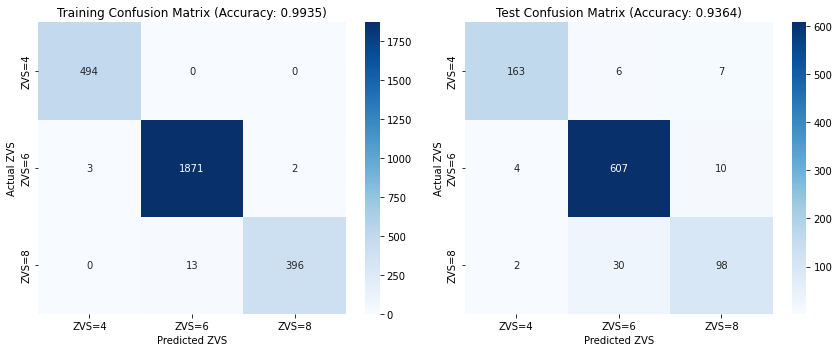

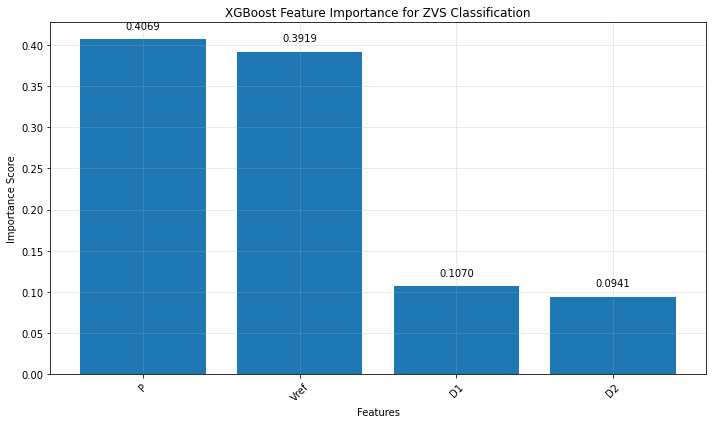


=== DETAILED CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

       ZVS=4       0.96      0.93      0.94       176
       ZVS=6       0.94      0.98      0.96       621
       ZVS=8       0.85      0.75      0.80       130

    accuracy                           0.94       927
   macro avg       0.92      0.89      0.90       927
weighted avg       0.94      0.94      0.93       927


=== FEATURE IMPORTANCE FOR ZVS CLASSIFICATION ===
P: 0.406942
Vref: 0.391909
D1: 0.107043
D2: 0.094106


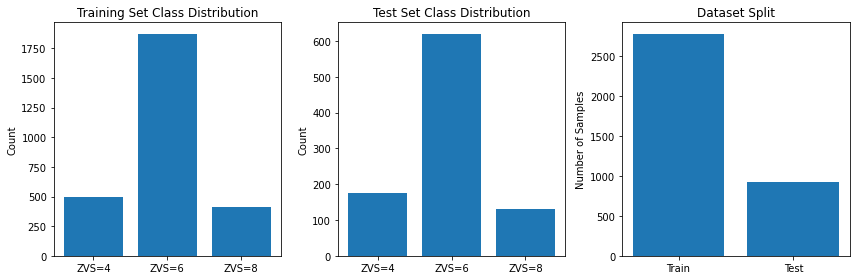


=== DATASET SUMMARY ===
Training samples: 2779
Test samples: 927
Total samples: 3706
Number of classes: 3


In [16]:
#------------------------------------------------------------------------------------------------
# Define the xgboost model for ZVS classification, and implement the training process
#------------------------------------------------------------------------------------------------

import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data for ZVS classification
input_features = ["P", "Vref", "D1", "D2"]
output_feature = "total_ZVS"

# Extract features and target
X = df_final[input_features].values
y = df_final[output_feature].values

# Create mapping for ZVS classes
map_y = {4: 0, 6: 1, 8: 2}  # Map 4->0, 6->1, 8->2 for 3 classes (0,1,2)
y_mapped = np.array([map_y[y_val] for y_val in y])

# Split the data: train/val/test (60/20/20) similar to the regression code above
X_temp, X_test, y_temp, y_test = train_test_split(X, y_mapped, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Initialize and train XGBoost classifier with optimized hyperparameters for class imbalance
xgb_classifier = xgb.XGBClassifier(
    n_estimators=100,          # Number of boosting rounds
    max_depth=6,                # Maximum depth of trees
    learning_rate=0.2,        # Learning rate (eta)
    random_state=42,
    eval_metric='merror',        # Multiclass classification error rate
    early_stopping_rounds=5,     # Early stopping to prevent overfitting
)

print("Training the ZVS classification XGBoost model...")
xgb_classifier.fit(
    X_train_scaled, y_train,
    eval_set=[(X_val_scaled, y_val)],
    verbose=True
)

# Make predictions
y_train_pred = xgb_classifier.predict(X_train_scaled)
y_val_pred = xgb_classifier.predict(X_val_scaled)
y_test_pred = xgb_classifier.predict(X_test_scaled)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"\n=== XGBOOST ZVS CLASSIFICATION RESULTS ===")
print(f"Training Accuracy: {train_accuracy:.6f}")
print(f"Validation Accuracy: {val_accuracy:.6f}")
print(f"Test Accuracy: {test_accuracy:.6f}")

# Plot the classification results
from utils import classification_analysis

classification_analysis(
    y_train, y_train_pred, train_accuracy,
    y_test, y_test_pred, test_accuracy,
    xgb_classifier, input_features,
    y_mapped
)


## Section 4. Modulation Optimization with Meta-Heuristic Algorithms
    Tune the hyperparameters of PSO algorithms and observe searching behaviors
* Particle swarm optimization to search within D1 and D2 ranges given P and Vref values

<div style="background-color:#ffe599; padding:10px; border-radius:5px; text-align:center; font-size:1.35em;">
   <b style="color:#222222;">Hands-on Experiment 5:</b>
   <span style="color:#333333;">Tune PSO for Modulation Optimization</span>
</div>

In [17]:
#------------------------------------------------------------------------------------------------
# Implement the PSO algorithm to search within D1 and D2 ranges given P and Vref values
# Reference: xgboost_buck_modeling.ipynb PSO section
#------------------------------------------------------------------------------------------------

import pyswarms as ps
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Set fixed parameters
P_fixed = 100
Vref_fixed = 160

# Define D1 and D2 bounds
d1_min, d1_max = 0.6, 1.0
d2_min, d2_max = 0.6, 1.0
bounds = (np.array([d1_min, d2_min]), np.array([d1_max, d2_max]))

# Velocity bounds: 40% of the range for each dimension
vmax = 0.4 * (bounds[1] - bounds[0])
vmin = -vmax
velocity_clamp = (vmin, vmax)

# PSO options: c1 and c2 to 2.05, w will be changed from 0.9 to 0.0 during operation
options = {'c1': 0.3, 'c2': 0.7, 'w': 0.9}

n_particles = 10
dimensions = 2
n_iters = 200

# Latin Hypercube Initialization for Swarm Positions
def latin_hypercube_sampling(n_samples, bounds, random_state=None):
    lower, upper = np.array(bounds[0]), np.array(bounds[1])
    dim = len(lower)
    cut = np.linspace(0, 1, n_samples + 1)
    if random_state is not None:
        rng = np.random.RandomState(random_state)
        u = rng.rand(n_samples, dim)
    else:
        u = np.random.rand(n_samples, dim)
    a = cut[:n_samples]
    b = cut[1:n_samples+1]
    rdpoints = np.zeros_like(u)
    for j in range(dim):
        rdpoints[:, j] = u[:, j] * (b - a) + a
        if random_state is not None:
            rng.shuffle(rdpoints[:, j])
        else:
            np.random.shuffle(rdpoints[:, j])
    samples = lower + rdpoints * (upper - lower)
    return samples

init_pos = latin_hypercube_sampling(
    n_particles,
    ([d1_min, d2_min], [d1_max, d2_max]),
    random_state=RANDOM_SEED
)

# Objective function: minimize current stress, penalize if ZVS != 8
def objective(X):
    n_particles = X.shape[0]
    costs = np.zeros(n_particles)
    for i in range(n_particles):
        D1, D2 = X[i, 0], X[i, 1]
        X_input = np.array([[P_fixed, Vref_fixed, D1, D2]])
        X_input_scaled = scaler.transform(X_input)
        X_input_tensor = torch.FloatTensor(X_input_scaled)
        model_NN_regression.eval()
        model_NN_classification.eval()
        with torch.no_grad():
            current_stress = model_NN_regression(X_input_tensor).squeeze().item()
            zvs_output = model_NN_classification(X_input_tensor)
            zvs_prediction = torch.argmax(zvs_output, dim=1).item()
            zvs_mapping = {0: 4, 1: 6, 2: 8}
            zvs_prediction = zvs_mapping[zvs_prediction]
        penalty = abs(zvs_prediction - 8) * 1000
        costs[i] = current_stress + penalty
    return costs

optimizer = ps.single.GlobalBestPSO(
    n_particles=n_particles,
    dimensions=dimensions,
    options=options,
    bounds=bounds,
    velocity_clamp=velocity_clamp,
    init_pos=init_pos
)

cost_history = []
pos_history = []
swarm_history = []
velocity_history = []

w_start = 0.9
w_end = 0.4

for i in range(n_iters):
    # Linearly interpolate w
    if i <= n_iters-50:
        w = w_start + (w_end - w_start) * (i / ((n_iters-50) - 1))
    else:
        w = w_end
    optimizer.options['w'] = w
    optimizer.optimize(objective, iters=1, verbose=False)
    cost_history.append(optimizer.swarm.best_cost)
    pos_history.append(optimizer.swarm.best_pos.copy())
    swarm_history.append(optimizer.swarm.position.copy())
    velocity_history.append(optimizer.swarm.velocity.copy())

best_cost = optimizer.swarm.best_cost
best_pos = optimizer.swarm.best_pos

print(best_cost, best_pos)

6.212855815887451 [0.60037692 0.75116858]


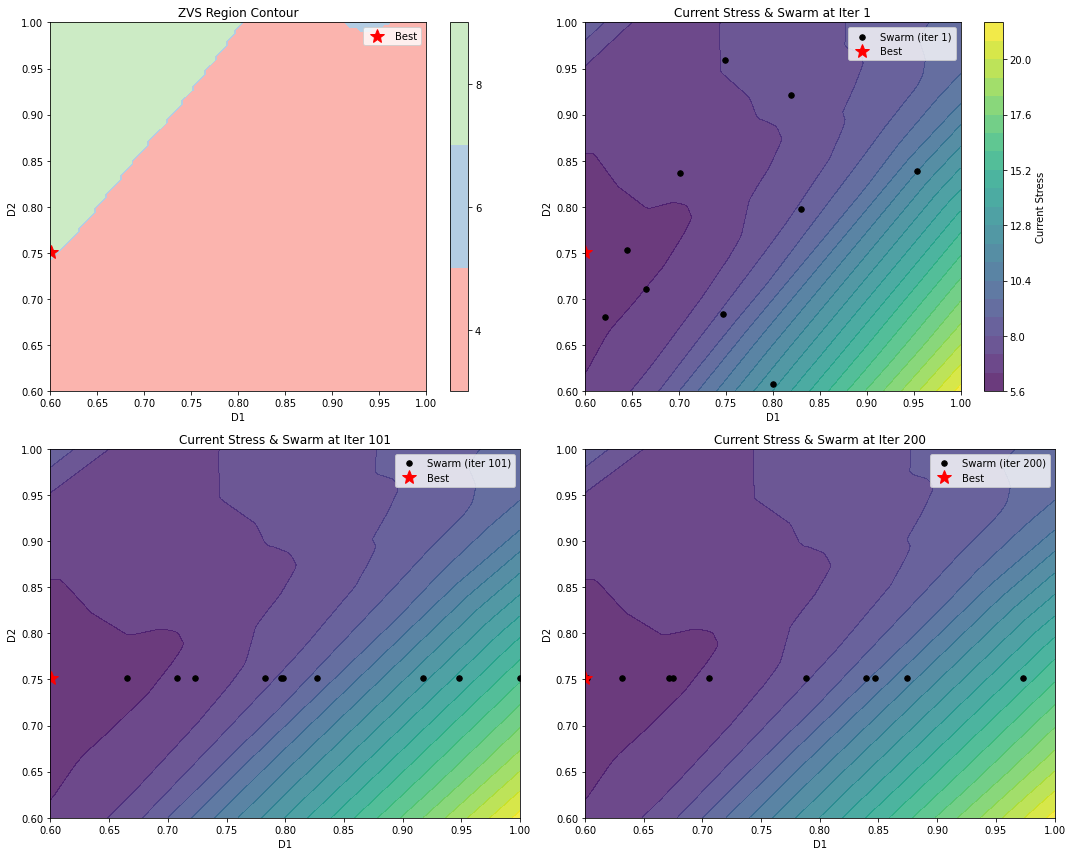

Optimized current stress: 6.2129
Target ZVS devices: 8


In [18]:
# --- Plotting Section ---
# 1st subfigure: contour of ZVS
# The rest: current stress contours at selected optimization steps

# Prepare grid for contour plots
d1_vals = np.linspace(d1_min, d1_max, 100)
d2_vals = np.linspace(d2_min, d2_max, 100)
D1_grid, D2_grid = np.meshgrid(d1_vals, d2_vals)
ZVS_grid = np.zeros_like(D1_grid)
CurrentStress_grid = np.zeros_like(D1_grid)

# Compute ZVS grid (for 1st subplot)
model_NN_classification.eval()
with torch.no_grad():
    for i in range(D1_grid.shape[0]):
        for j in range(D1_grid.shape[1]):
            X_grid = np.array([[P_fixed, Vref_fixed, D1_grid[i, j], D2_grid[i, j]]])
            X_grid_scaled = scaler.transform(X_grid)
            X_grid_tensor = torch.FloatTensor(X_grid_scaled)
            zvs_output = model_NN_classification(X_grid_tensor)
            zvs_pred = torch.argmax(zvs_output, dim=1).item()
            zvs_mapping = {0: 4, 1: 6, 2: 8}
            ZVS_grid[i, j] = zvs_mapping[zvs_pred]

# Compute current stress grid (for later subplots)
model_NN_regression.eval()
with torch.no_grad():
    for i in range(D1_grid.shape[0]):
        for j in range(D1_grid.shape[1]):
            X_grid = np.array([[P_fixed, Vref_fixed, D1_grid[i, j], D2_grid[i, j]]])
            X_grid_scaled = scaler.transform(X_grid)
            X_grid_tensor = torch.FloatTensor(X_grid_scaled)
            current_stress = model_NN_regression(X_grid_tensor).squeeze().item()
            CurrentStress_grid[i, j] = current_stress

# Choose which iterations to plot (e.g., 1st, 50th, last)
plot_steps = [0, n_iters//2, n_iters-1]
n_plots = 1 + len(plot_steps)

# Arrange subplots in 2 rows, 2 columns for clear visualization
nrows, ncols = 2, 2
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 12))
axes = axes.flatten()

# 1st subplot: ZVS contour
ax = axes[0]
contour = ax.contourf(D1_grid, D2_grid, ZVS_grid, levels=[3,5,7,9], colors=['#fbb4ae','#b3cde3','#ccebc5'])
cbar = fig.colorbar(contour, ax=ax, ticks=[4,6,8])
ax.set_title('ZVS Region Contour')
ax.set_xlabel('D1')
ax.set_ylabel('D2')
ax.set_xlim([d1_min, d1_max])
ax.set_ylim([d2_min, d2_max])

# Overlay the best position
ax.plot(best_pos[0], best_pos[1], 'r*', markersize=15, label='Best')
ax.legend()

# Next subplots: current stress contour + swarm positions at selected steps
for idx, step in enumerate(plot_steps):
    ax = axes[idx+1]
    cs_contour = ax.contourf(D1_grid, D2_grid, CurrentStress_grid, levels=20, cmap='viridis', alpha=0.8)
    if idx == 0:
        # Add colorbar only to the first current stress subplot
        fig.colorbar(cs_contour, ax=ax, label='Current Stress')
    swarm_pos = swarm_history[step]
    ax.scatter(swarm_pos[:,0], swarm_pos[:,1], c='k', s=30, label=f'Swarm (iter {step+1})')
    ax.plot(best_pos[0], best_pos[1], 'r*', markersize=15, label='Best')
    ax.set_title(f'Current Stress & Swarm at Iter {step+1}')
    ax.set_xlabel('D1')
    ax.set_ylabel('D2')
    ax.set_xlim([d1_min, d1_max])
    ax.set_ylim([d2_min, d2_max])
    ax.legend()

# Hide any unused subplots (if n_plots < nrows*ncols)
for i in range(n_plots, nrows*ncols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Evaluate the best solution
X_best = np.array([[P_fixed, Vref_fixed, best_pos[0], best_pos[1]]])
X_best_scaled = scaler.transform(X_best)
X_best_tensor = torch.FloatTensor(X_best_scaled)

model_NN_regression.eval()
model_NN_classification.eval()
with torch.no_grad():
    best_current_stress = model_NN_regression(X_best_tensor).item()
    best_zvs_prediction = model_NN_classification(X_best_tensor).argmax(dim=1).item()
    zvs_mapping = {0: 4, 1: 6, 2: 8}
    best_zvs_prediction = zvs_mapping[best_zvs_prediction]

print(f"Optimized current stress: {best_current_stress:.4f}")
print(f"Target ZVS devices: {best_zvs_prediction}")